# Statistical Analysis of the Dataset and Clusters Found 

## Features Statistics

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

In [43]:
feature_dataset = pd.read_csv('data/Features.csv')
labels = ["Age","Gender","Height","ICUType","Weight","Albumin","ALP","ALT","AST","Bilirubin","BUN","Cholesterol",
          "Creatinine","DiasABP","FiO2","GCS","Glucose","HCO3","HCT","HR","K","Lactate","Mg","MAP","Na",
          "NIDiasABP","NIMAP","NISysABP","PaCO2","PaO2","pH","Platelets","RespRate","SaO2","SysABP","Temp",
          "Urine","WBC"]

# There are actually 4000 patient rows. Use feature_dataset.shape[0] as argument for _.head() to see allof them
feature_dataset.head()

,Age,Gender,Height,ICUType,Weight,Albumin,ALP,ALT,AST,Bilirubin,...,PaC02.1,Pa02.1,pH.1,Platelets.1,RespRate.1,Sa02.1,SysABP.1,Temp.1,Urine.1,WBC.1
0,54,0.0,169.787227,4,83.027747,2.971867,104.634113,171.741809,240.465689,1.902148,...,4.487246,56.968913,0.251759,25.455844,3.216898,1.190663,17.136990,0.935385,171.870307,1.272792
1,76,1.0,175.300000,2,80.670588,2.971867,104.634113,171.741809,240.465689,1.902148,...,5.241774,136.881248,0.037796,33.306156,3.713236,2.041241,16.338979,0.986234,161.509760,3.350124
2,44,0.0,169.787227,3,56.700000,2.500000,116.000000,83.000000,199.500000,2.900000,...,1.914854,82.140124,0.017321,21.079216,3.713236,0.000000,12.153017,0.642112,93.216670,1.322876
3,68,1.0,180.300000,3,84.600000,4.400000,105.000000,12.000000,15.000000,0.200000,...,4.487246,56.968913,0.251759,55.054518,3.410542,1.190663,17.136990,0.490160,224.953699,1.873499
4,88,0.0,169.787227,3,83.027747,3.300000,104.634113,171.741809,240.465689,1.902148,...,4.487246,56.968913,0.251759,8.485281,3.263814,1.190663,17.136990,0.470865,39.383198,0.707107


Choose the health features that you want to analyse by typing them (without quotation marks). 
Recommended to take a look at AST and ALT

Which health features you want to analyse?: AST


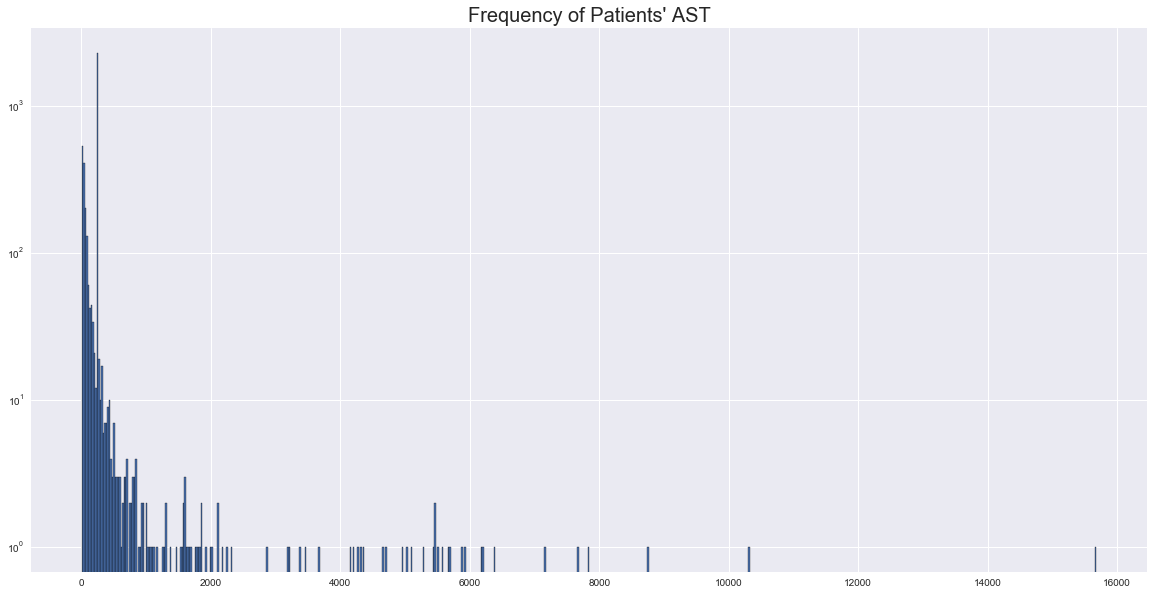

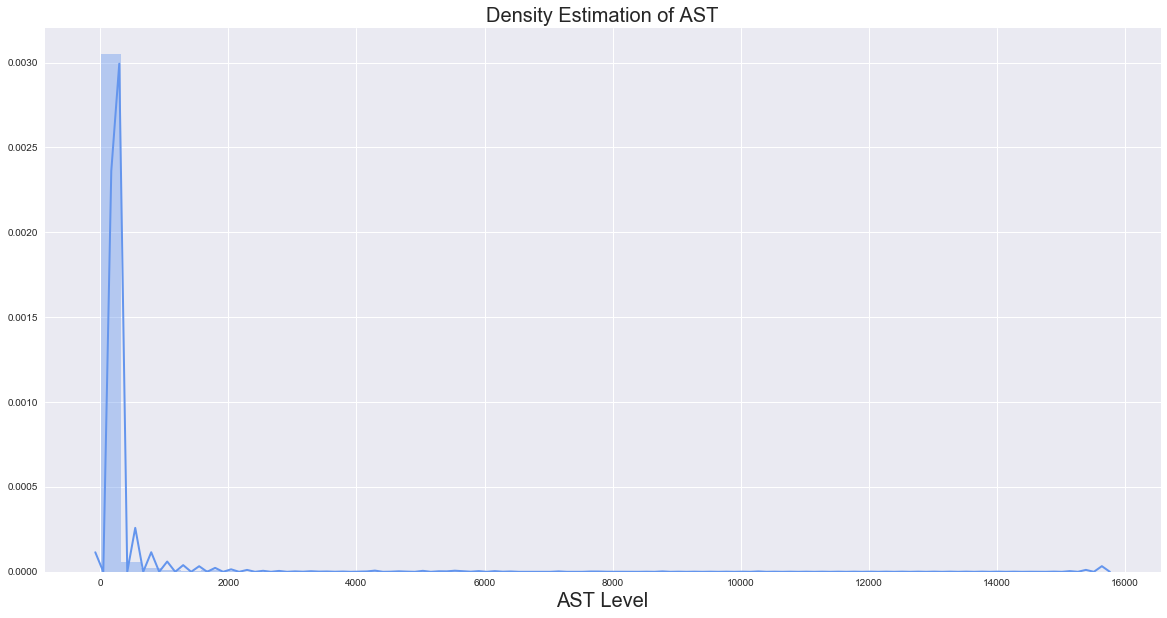

Average of patients' AST :  240.46568888071997
Variance of patients' AST :  339277.2153311225
Standard deviation of patients' AST :  582.4750770042633
Highest level of patients' AST :  15680.0
Lowest level of patients' AST :  6.0


In [14]:
pylab.rcParams['figure.figsize'] = (20, 10)
pylab.rcParams['font.size'] = 24
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

labels_dict = {key: l for l, key in enumerate(labels)}

choice = str(input('Which health features you want to analyse?: '))
i = labels_dict[choice]
D = feature_dataset.iloc[:, i].values

patientid = np.array([x for x in range(len(D))])

f = 20

# Frequency histogram
plt.hist(D, bins='auto', density = False, edgecolor='k') #use fd, auto, and sturges
plt.yscale('log')
plt.title("Frequency of Patients' " + str(labels[i]), fontsize = f)
plt.grid(True)
plt.show()

# Estimated distribution
sx = sns.distplot(D, hist= True, kde=True, norm_hist = True,
             color = 'cornflowerblue', kde_kws={'linewidth': 2})
sx.axes.set_title("Density Estimation of " + str(labels[i]), fontsize = f)
sx.set_xlabel(str(labels[i]) + " Level", fontsize= f)
plt.show()

# Basic stats of the chosen health characteristics
m = np.mean(D)
print("Average of patients' " + str(labels[i]) +" : ", m)
var = np.var(D)
print("Variance of patients' " + str(labels[i]) +" : ", var)
s= np.std(D)
print("Standard deviation of patients' " + str(labels[i]) +" : ", s)
maxD = max(D)
print("Highest level of patients' " + str(labels[i]) +" : ", maxD)
minD = min(D)
print("Lowest level of patients' " + str(labels[i]) +" : ", minD)

### Distribution of Variances

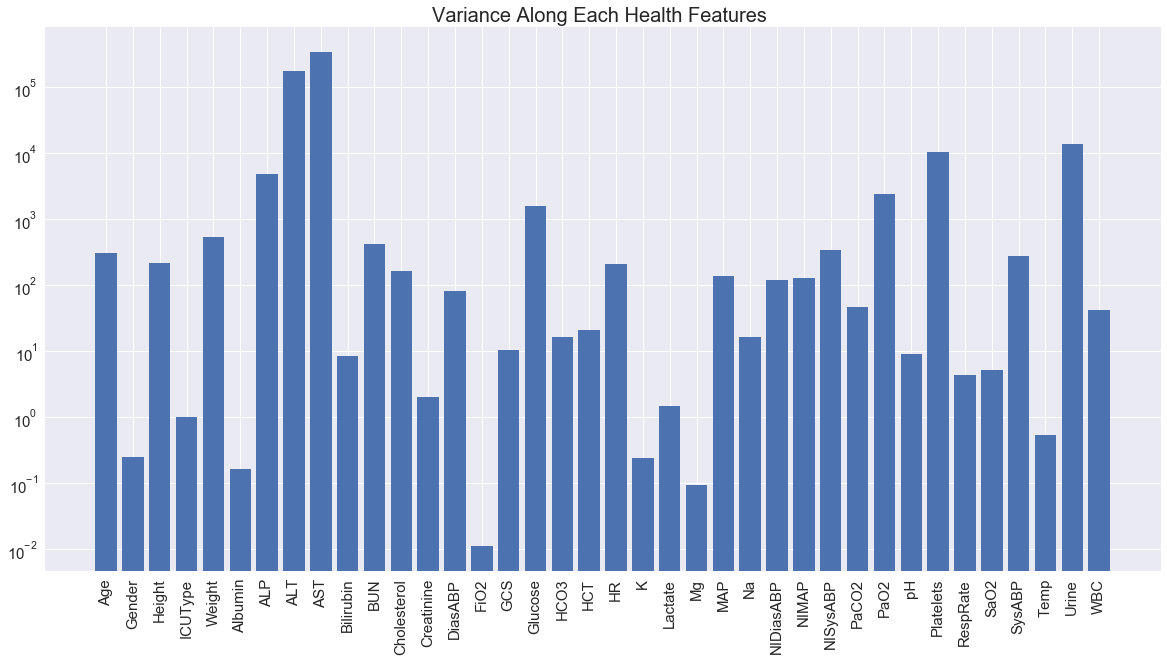

Total variances percentage of ALT and AST: 0.9948916391496028


In [17]:
variances = []
for j in range(0,38):
    D = feature_dataset.iloc[:, j].values
    var = np.var(D)
    variances.append(var)

features = np.array([x for x in range(len(labels))])

Var = np.array(variances)

# Plotting the variances
plt.bar(labels, np.array(variances))
plt.yscale('log')
plt.xticks(labels, rotation='vertical', fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Variance Along Each Health Features ", fontsize = 20)
plt.grid(True)
plt.show()

# Determining how much percentage AST and ALT carries in the total variances of the data
highest = np.log(variances[7] + variances[8])
print("Total variances percentage of ALT and AST: "+ str(highest/np.log(sum(variances))))

This shows that ALT and AST accounts for **99.5 percent** of all the variances in the data, which explains our clustering result. 

## Cluster Statistics

### Statistics for k=2 Clusters

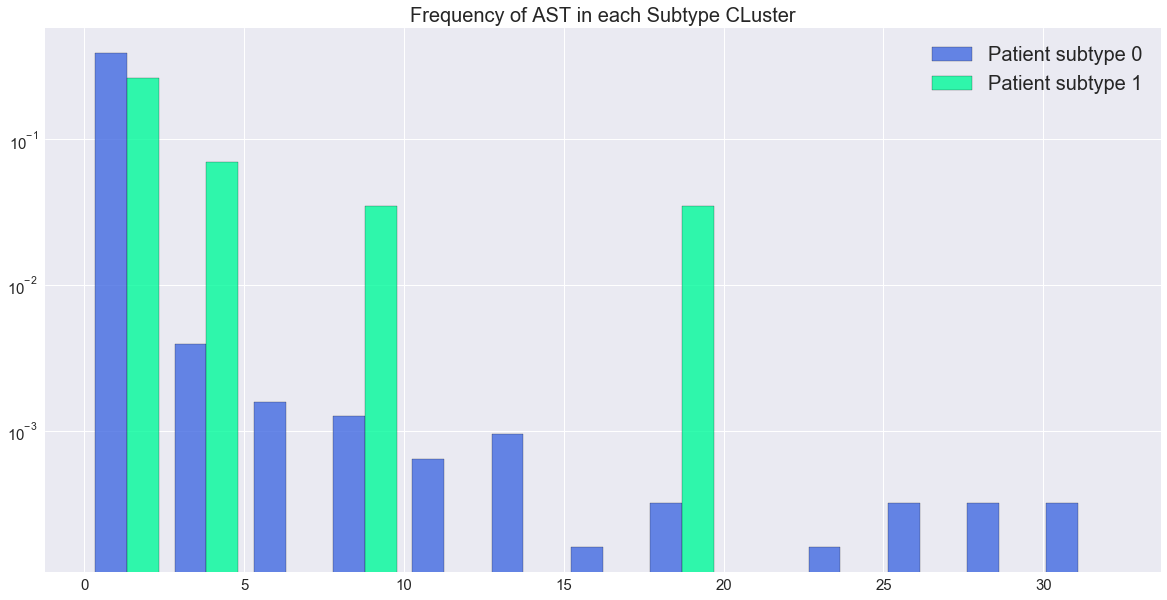

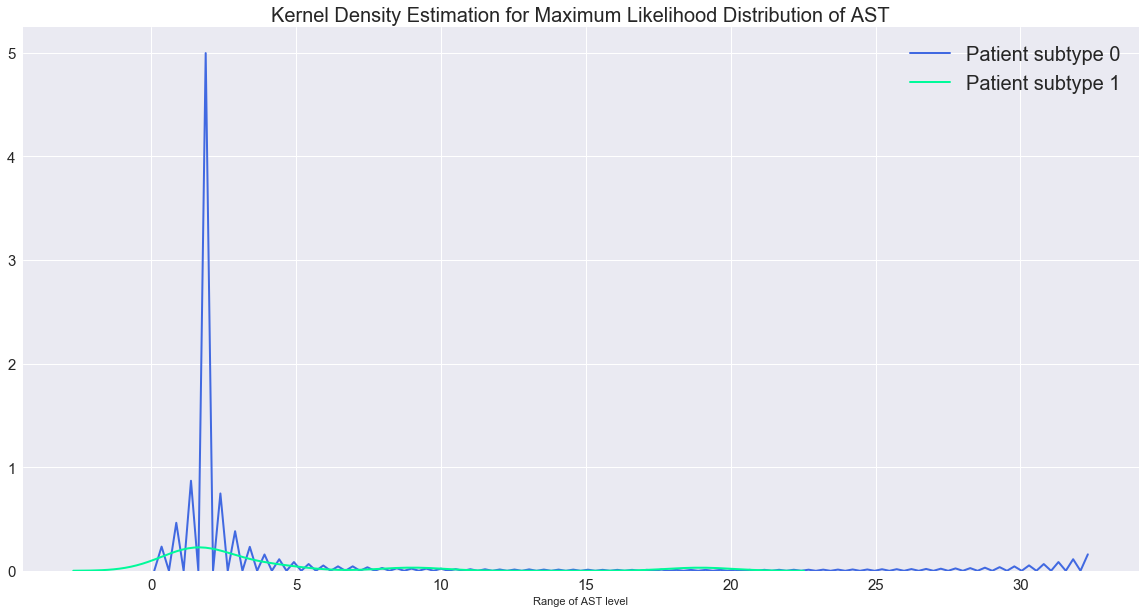

In [33]:
clabels = ["PatientsID","Age","Gender","Height","ICUType","Weight","Albumin","ALP","ALT","AST","Bilirubin","BUN","Cholesterol",
          "Creatinine","DiasABP","FiO2","GCS","Glucose","HCO3","HCT","HR","K","Lactate","Mg","MAP","Na",
          "NIDiasABP","NIMAP","NISysABP","PaCO2","PaO2","pH","Platelets","RespRate","SaO2","SysABP","Temp",
          "Urine","WBC"]

# Fixing index difference
i = labels_dict[choice] + 1
j = i - 1

cluster1K2_dataset = pd.read_csv('data/cluster1k2.csv')
s1 = cluster1K2_dataset.iloc[:, i].values

cluster2K2_dataset = pd.read_csv('data/cluster2k2.csv')
s2 = cluster2K2_dataset.iloc[:, i].values

plt.hist([s1,s2], bins = 'sturges', alpha = 0.8, density = True,
         label = ['Patient subtype 0','Patient subtype 1'],
        color = ['royalblue','mediumspringgreen'],
        edgecolor = 'k')

plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Frequency of " + str(clabels[i]) + ' in each Subtype CLuster', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.grid(True)
plt.show()

sns.distplot(s1, hist=False, kde=True, 
             color = 'royalblue', kde_kws={'linewidth': 2}, label='Patient subtype 0') 
sns.distplot(s2, hist=False, kde=True, 
             color = 'mediumspringgreen', kde_kws={'linewidth': 2}, label='Patient subtype 1') 

plt.title("Kernel Density Estimation for Maximum Likelihood Distribution of " + str(clabels[i]), fontsize = 20)
plt.xlabel("Range of " + str(clabels[i]) + " level")
plt.legend(loc = 'best', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Statistics for k=5 Clusters

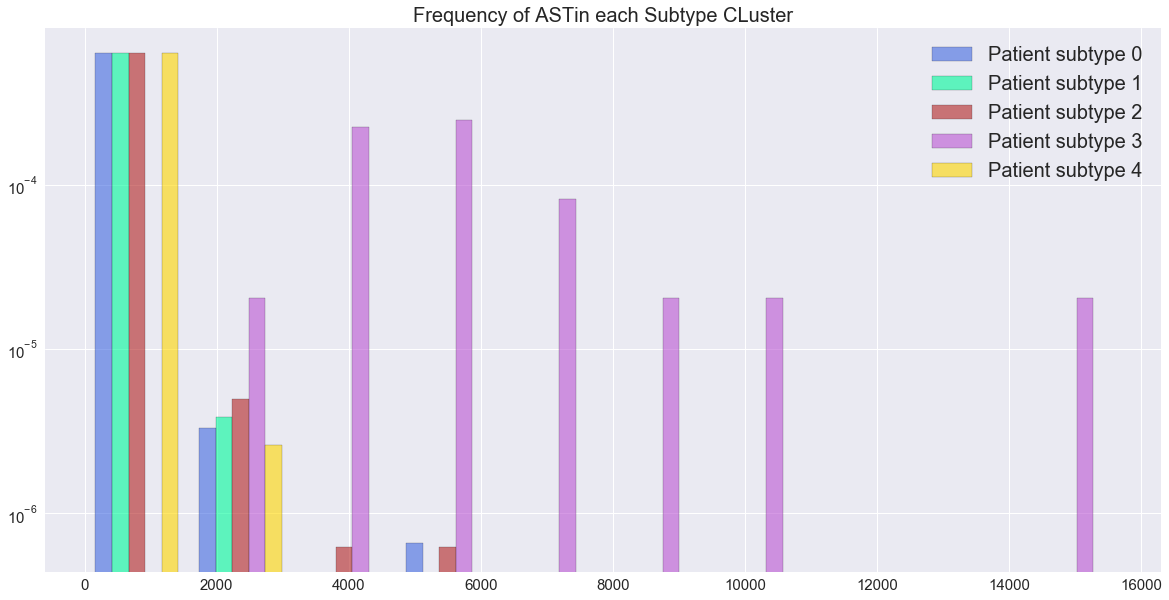

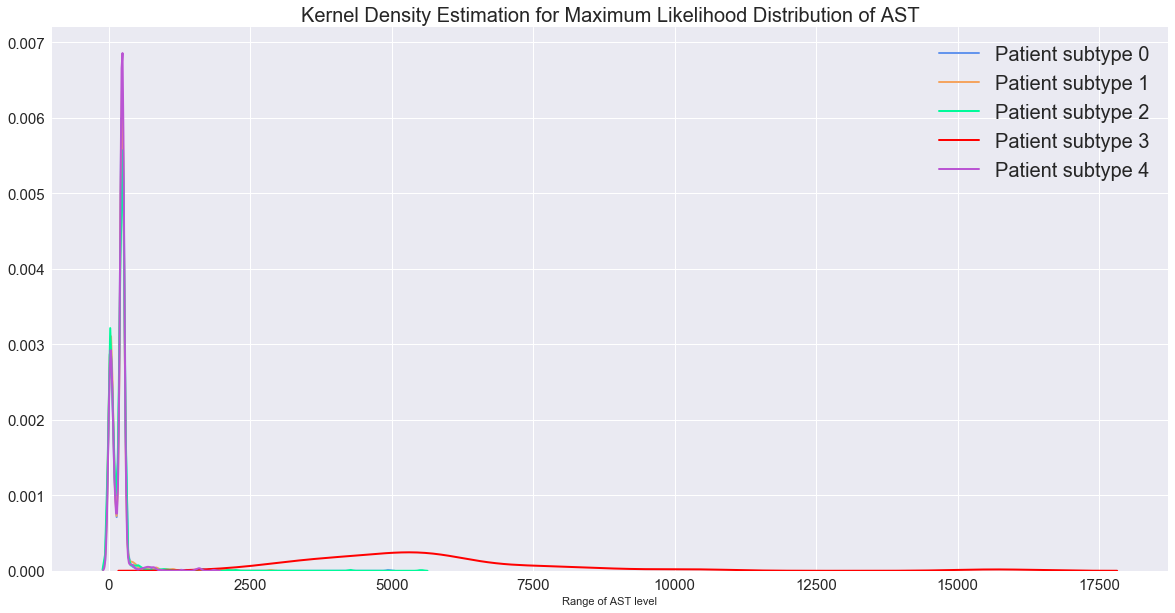

Average of each clusters' AST :  [ 197.16737383  197.57664493  198.42032356 5682.03870968  192.58555454]
Variance of each clusters' AST :  [  54157.3148295    43675.35320872   81813.65875998 6180581.30559834
   25567.52179107]
Average of patients' AST :  240.46568888071997
Variance of patients' AST :  339277.2153311225
Standard deviation of patients' AST :  582.4750770042633


In [42]:
population_dataset = pd.read_csv('data/Features.csv')
P = population_dataset.iloc[:, j].values

cluster1_dataset = pd.read_csv('data/cluster1.csv')
c1 = cluster1_dataset.iloc[:, i].values

cluster2_dataset = pd.read_csv('data/cluster2.csv')
c2 = cluster2_dataset.iloc[:, i].values

cluster3_dataset = pd.read_csv('data/cluster3.csv')
c3 = cluster3_dataset.iloc[:, i].values

cluster4_dataset = pd.read_csv('data/cluster4.csv')
c4 = cluster4_dataset.iloc[:, i].values

cluster5_dataset = pd.read_csv('data/cluster5.csv')
c5 = cluster5_dataset.iloc[:, i].values

f = 20

plt.hist([c1,c2,c3,c4,c5], alpha = 0.6, density = True,
         label = ['Patient subtype 0','Patient subtype 1','Patient subtype 2','Patient subtype 3','Patient subtype 4'],
        color = ['royalblue','mediumspringgreen','firebrick', 'mediumorchid','gold'],
        edgecolor = 'k')

# Frequency histogram
plt.title("Frequency of " + str(clabels[i]) + ' in each Subtype CLuster', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.show()

#Kernel Density Estimation
sns.distplot(c1, hist=False, kde=True, 
             color = 'cornflowerblue', kde_kws={'linewidth': 2}, label='Patient subtype 0') 
sns.distplot(c2, hist=False, kde=True, 
             color = 'sandybrown', kde_kws={'linewidth': 2}, label='Patient subtype 1') 
sns.distplot(c3, hist=False, kde=True, 
             color = 'mediumspringgreen', kde_kws={'linewidth': 2}, label='Patient subtype 2') 
sns.distplot(c4, hist=False, kde=True, 
             color = 'red', kde_kws={'linewidth': 2}, label='Patient subtype 3') 
sns.distplot(c5, hist=False, kde=True, 
             color = 'mediumorchid', kde_kws={'linewidth': 2}, label='Patient subtype 4') 

plt.title("Kernel Density Estimation for Maximum Likelihood Distribution of " + str(clabels[i]), fontsize = 20)
plt.xlabel("Range of " + str(clabels[i]) + " level")
plt.legend(loc = 'best', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Comparing clusters statistics agains overal patient population statistics 
cm1 = np.mean(c1)
cm2 = np.mean(c2)
cm3 = np.mean(c3)
cm4 = np.mean(c4)
cm5 = np.mean(c5)

totalmeans = np.array([cm1,cm2,cm3,cm4,cm5])
populationmeans = np.mean(totalmeans)

var1 = np.var(c1)
var2 = np.var(c2)
var3 = np.var(c3)
var4 = np.var(c4)
var5 = np.var(c5)

totalvariances = np.array([var1,var2,var3,var4,var5])
populationvar = np.var(totalvariances)

print("Average of each clusters' " + str(clabels[i]) +" : ", totalmeans)

print("Variance of each clusters' " + str(clabels[i]) +" : ", totalvariances)

m = np.mean(P)
print("Average of patients' " + str(clabels[i]) +" : ", m)
var = np.var(P)
print("Variance of patients' " + str(clabels[i]) +" : ", var)
s= np.std(P)
print("Standard deviation of patients' " + str(clabels[i]) +" : ", s)


## Survival Statistics

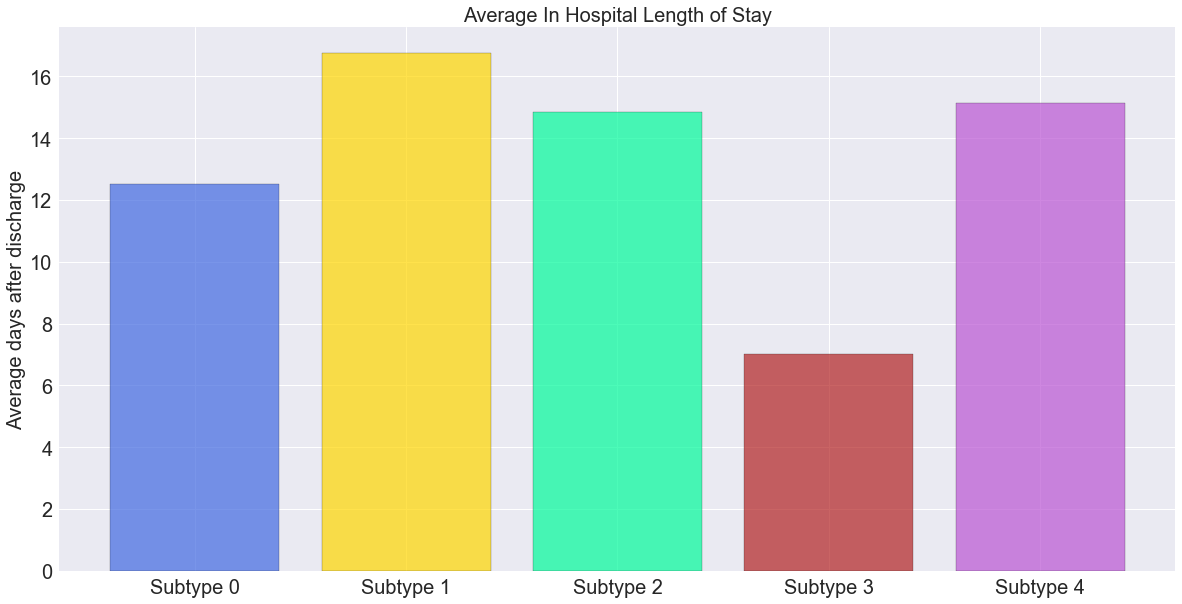

Subtype's In Hospital Length of Stay mean:  [135.09540636042402, 35.333333333333336, 48.26315789473684, 0.7142857142857143, 123.42227042660882]
Population In Hospital Length of Stay mean:  129.367


C:\Users\Farrel\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
# Statistics for various discharge metric data
labels = ["SAPS-I", "SOFA", "Survival Rate After Discharge", "In Hospital Length of Stay"]
ylabels = ["SAPS-I", "SOFA", "Mean values", "Average days after discharge"]

#set k = 42 for length of stay and k=41 for survival rate
k = 42

subtype0_dataset = pd.read_csv('data/pdata05.csv')
s0 = subtype0_dataset.iloc[:, k].values
s0[np.isnan(s0)] = 0

subtype1_dataset = pd.read_csv('data/pdata15.csv')
s1 = subtype1_dataset.iloc[:, k].values
s1[np.isnan(s1)] = 0

subtype2_dataset = pd.read_csv('data/pdata25.csv')
s2 = subtype2_dataset.iloc[:, k].values
s2[np.isnan(s2)] = 0

subtype3_dataset = pd.read_csv('data/pdata35.csv')
s3 = subtype3_dataset.iloc[:, k].values
s3[np.isnan(s3)] = 0

subtype4_dataset = pd.read_csv('data/pdata45.csv')
s4 = subtype4_dataset.iloc[:, k].values
s4[np.isnan(s4)] = 0


sm0 = np.mean(s0)
sm1 = np.mean(s1)
sm2 = np.mean(s2)
sm3 = np.mean(s3)
sm4 = np.mean(s4)

if k == 39:
    label1 = labels[0]
    label2 = ylabels[0]
elif k == 40:
    label1 = labels[1]
    label2 = ylabels[1]
elif k == 41:
    label1 = labels[2]
    label2 = ylabels[2]
elif k == 42:
    label1 = labels[3]
    label2 = ylabels[3]

plt.bar(["Subtype 0","Subtype 1","Subtype 2","Subtype 3","Subtype 4"],
        [sm0,sm1,sm2,sm3,sm4], 
        color = ['royalblue', 'gold', 'mediumspringgreen','firebrick', 'mediumorchid'],
        edgecolor = 'black',
        alpha = 0.7)

plt.title('Average ' + label1, fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(label2, fontsize = 20)
plt.show()

# Comparing cluster survival statistics with overall population statistics
patient_dataset = pd.read_csv('data/patients_data.csv')
p = patient_dataset.iloc[:, k]
p[np.isnan(p)] = 0
mp = np.mean(p)
sp = np.std(p)

print("Subtype's " + label1 + " mean: ", [sm0,sm1,sm2,sm3,sm4])
print("Population " + label1 + " mean: ", mp)

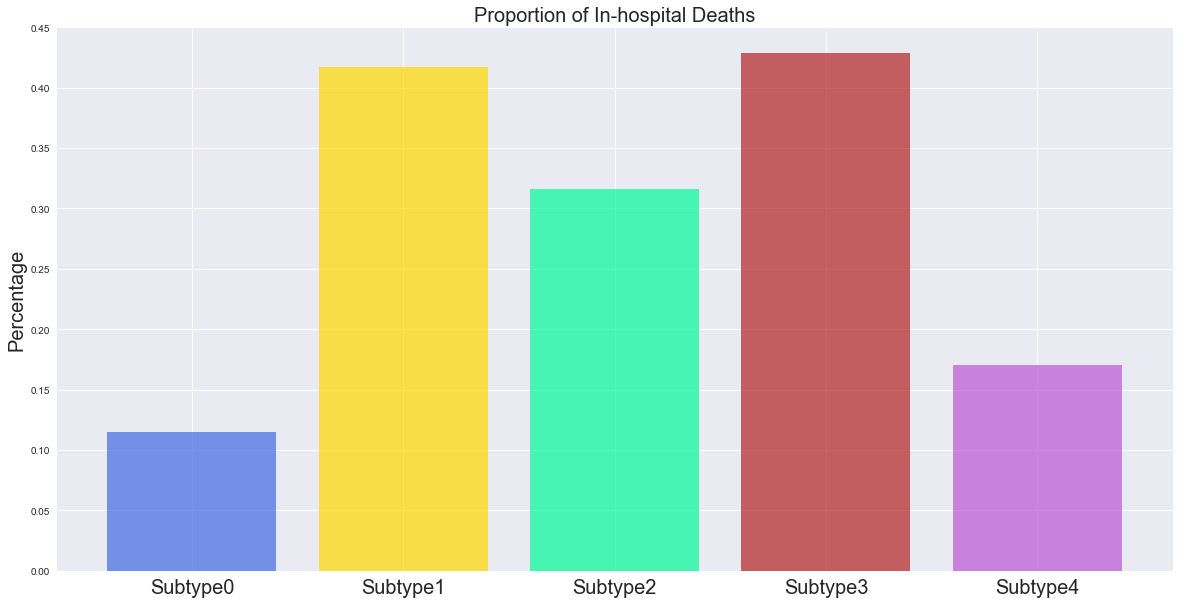

In [56]:
# Statistics on mortality rate
k = 43
subtype0_dataset = pd.read_csv('data/pdata05.csv')
s0 = subtype0_dataset.iloc[:, k].values
s0[np.isnan(s0)] = 0

subtype1_dataset = pd.read_csv('data/pdata15.csv')
s1 = subtype1_dataset.iloc[:, k].values
s1[np.isnan(s1)] = 0

subtype2_dataset = pd.read_csv('data/pdata25.csv')
s2 = subtype2_dataset.iloc[:, k].values
s2[np.isnan(s2)] = 0

subtype3_dataset = pd.read_csv('data/pdata35.csv')
s3 = subtype3_dataset.iloc[:, k].values
s3[np.isnan(s3)] = 0

subtype4_dataset = pd.read_csv('data/pdata45.csv')
s4 = subtype4_dataset.iloc[:, k].values
s4[np.isnan(s4)] = 0

deaths0 = []
lives0 = []
for i in range(len(s0)):
    if s0[i] == 1:
        d = s0[i]
        deaths0.append(d)
    elif s0[i] == 0:
        l = s0[i]
        lives0.append(l)
                
deaths1 = []
lives1 = []
for i in range(len(s1)):
    if s1[i] == 1:
        d = s1[i]
        deaths1.append(d)
    elif s1[i] == 0:
        l = s1[i]
        lives1.append(l)
        
deaths2 = []
lives2 = []
for i in range(len(s2)):
    if s2[i] == 1:
        d = s2[i]
        deaths2.append(d)
    elif s2[i] == 0:
        l = s2[i]
        lives2.append(l)
        
deaths3 = []
lives3 = []
for i in range(len(s3)):
    if s3[i] == 1:
        d = s3[i]
        deaths3.append(d)
    elif s3[i] == 0:
        l = s3[i]
        lives3.append(l)
        
deaths4 = []
lives4 = []
for i in range(len(s4)):
    if s4[i] == 1:
        d = s4[i]
        deaths4.append(d)
    elif s4[i] == 0:
        l = s4[i]
        lives4.append(l)

#print(s0)
#print(len(deaths0), len(lives0))
#print(len(deaths0) + len(lives0))

plt.bar(["Subtype0", "Subtype1", "Subtype2", "Subtype3", "Subtype4"], 
        [len(deaths0)/len(s0), len(deaths1)/len(s1), len(deaths2)/len(s2), len(deaths3)/len(s3), len(deaths4)/len(s4)],
        color = ['royalblue', 'gold', 'mediumspringgreen','firebrick', 'mediumorchid'], 
        alpha = 0.7)

plt.title("Proportion of In-hospital Deaths", fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel("Percentage", fontsize = 20)
plt.grid(True)
plt.show()

**Percentage of patients dying in admission:**

In [64]:
print('Subtype0: '+ str(len(deaths0)/len(s0)*100) + '%')
print('Subtype0: '+ str(len(deaths1)/len(s1)*100) + '%')
print('Subtype0: '+ str(len(deaths2)/len(s2)*100) + '%')
print('Subtype0: '+ str(len(deaths3)/len(s3)*100) + '%')
print('Subtype0: '+ str(len(deaths4)/len(s4)*100) + '%')

Subtype0: 11.503729878288183%
Subtype0: 41.66666666666667%
Subtype0: 31.57894736842105%
Subtype0: 42.857142857142854%
Subtype0: 17.064352856109906%
